In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [8]:
C = torch.randn(27,2)
C[[1,2]]

tensor([[-0.2537,  2.3576],
        [ 0.2173,  1.6787]])

In [9]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [10]:
C = torch.randn((27, 2))

In [11]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [12]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [13]:
torch.cat(torch.unbind(emb,1),1)
# torch.unbind(emb,1)

tensor([[-0.9396,  1.3124, -0.9396,  1.3124, -0.9396,  1.3124],
        [-0.9396,  1.3124, -0.9396,  1.3124,  0.9088,  1.3362],
        [-0.9396,  1.3124,  0.9088,  1.3362,  0.2770,  0.0459],
        [ 0.9088,  1.3362,  0.2770,  0.0459,  0.2770,  0.0459],
        [ 0.2770,  0.0459,  0.2770,  0.0459,  0.7266,  0.0696],
        [-0.9396,  1.3124, -0.9396,  1.3124, -0.9396,  1.3124],
        [-0.9396,  1.3124, -0.9396,  1.3124,  0.5025, -0.2132],
        [-0.9396,  1.3124,  0.5025, -0.2132,  0.7004,  0.5030],
        [ 0.5025, -0.2132,  0.7004,  0.5030, -0.5951, -0.2102],
        [ 0.7004,  0.5030, -0.5951, -0.2102,  0.4642,  1.0963],
        [-0.5951, -0.2102,  0.4642,  1.0963, -0.5951, -0.2102],
        [ 0.4642,  1.0963, -0.5951, -0.2102,  0.7266,  0.0696],
        [-0.9396,  1.3124, -0.9396,  1.3124, -0.9396,  1.3124],
        [-0.9396,  1.3124, -0.9396,  1.3124,  0.7266,  0.0696],
        [-0.9396,  1.3124,  0.7266,  0.0696,  0.4642,  1.0963],
        [ 0.7266,  0.0696,  0.4642,  1.0

In [14]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [15]:
h

tensor([[-0.0803, -0.5470, -0.2874,  ...,  0.9524,  0.0604,  0.8864],
        [ 0.7587,  0.4950,  0.9996,  ..., -0.4287, -0.1444,  0.9944],
        [ 0.9609,  0.9381,  0.9691,  ...,  0.2579,  0.8984,  0.8927],
        ...,
        [ 0.9572, -0.5454, -0.9999,  ...,  0.9969, -0.2118, -0.9999],
        [-0.9911,  0.0670, -0.0366,  ..., -0.8939, -0.5864, -0.9938],
        [ 0.9882, -0.8939,  0.7936,  ...,  0.9959, -0.8385,  0.4857]])

In [16]:
h.shape

torch.Size([32, 100])

In [17]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [18]:
logits = h @ W2 + b2

In [19]:
logits.shape

torch.Size([32, 27])

In [20]:
counts = logits.exp()

In [21]:
prob = counts / counts.sum(1, keepdims=True)

In [22]:
prob.shape

torch.Size([32, 27])

In [23]:
-prob[torch.arange(32), Y]

tensor([-7.1195e-05, -3.2133e-07, -8.3983e-10, -8.4509e-19, -6.5407e-04,
        -2.3485e-11, -5.6149e-04, -7.3149e-08, -8.4086e-10, -2.4073e-05,
        -1.6777e-07, -4.6516e-10, -1.9787e-07, -9.6023e-01, -1.3279e-13,
        -1.4785e-03, -2.5711e-08, -1.7916e-10, -8.5410e-16, -1.4390e-10,
        -6.0485e-10, -1.6530e-09, -9.9430e-01, -3.3435e-14, -3.2075e-03,
        -2.9924e-06, -3.1945e-08, -1.2285e-11, -1.0101e-09, -1.4339e-10,
        -3.7271e-14, -7.5578e-10])

In [24]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.4033)

In [25]:
# ------------ now made respectable :) ---------------

In [26]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [27]:

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [28]:
emb = C[X]
h = torch.tanh(emb.view(-1,6)@ W1 +b1)
logits = h @ W2+b2
# counts = logits.exp()
# prob = counts/counts.sum(1,keepdims=True)
# loss =-prob[torch.arange(32),Y].log().mean()
loss = F.cross_entropy(logits,Y)
loss

tensor(17.7697)

In [29]:
dim = 7 
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, dim), generator=g)
W1 = torch.randn((dim*3, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [30]:
sum(p.nelement() for p in parameters) # number of parameters in total

10016

In [31]:
for p in parameters:
  p.requires_grad = True

In [32]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [33]:
lri = []
lossi = []
stepi = []

In [34]:
for i in range(125000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, dim*3) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

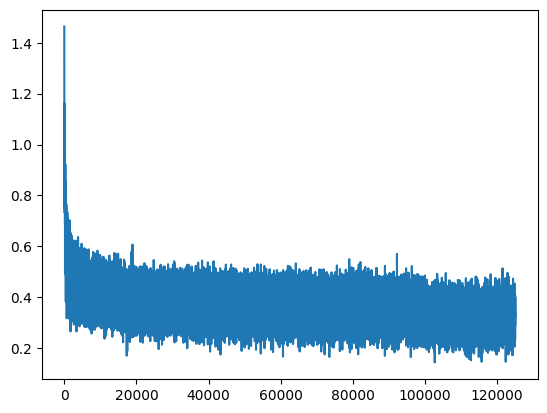

In [35]:
plt.plot(stepi, lossi)

In [36]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, dim*3) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1455, grad_fn=<NllLossBackward0>)

In [37]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, dim*3) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1750, grad_fn=<NllLossBackward0>)

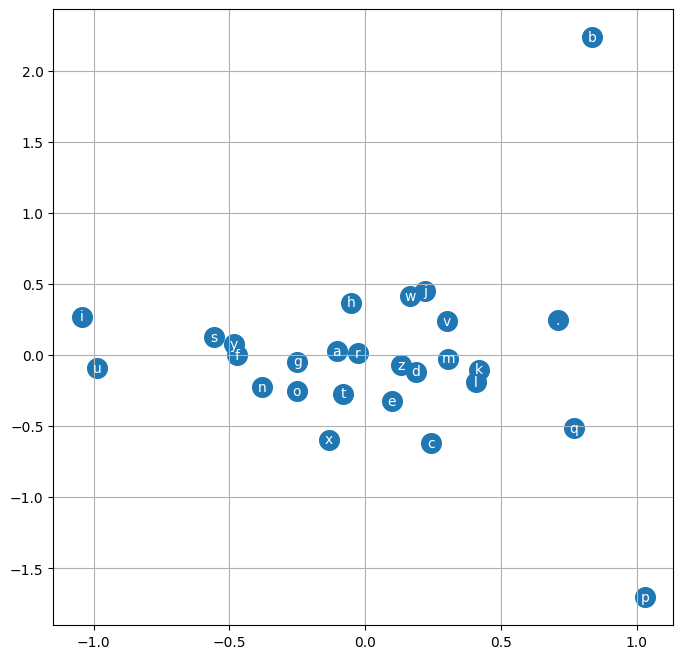

In [38]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [39]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [40]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 7])

In [41]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
amyanniee.
med.
ryal.
rethrujendraeg.
azeredielin.
shi.
jenleigh.
estanar.
elle.
malaia.
nosadhergahiriel.
kin.
rendy.
panterofyn.
zence.
ruyah.
faeh.
yume.
maston.
